<a href="https://colab.research.google.com/github/AndreMartins21/Analise_de_Dados_IFES/blob/main/analise_ifes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANÁLISE DE DADOS - IFES 

- Análise de dados a respeito da base de dados divulgadas pelo Instituto Federal do Espírito Santo (IFES)

In [ ]:
# Importações das bibliotecas e do arquivo CSV

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px

df = pd.read_csv('/content/ALUNOS-DA-GRADUACAO.csv', sep=';')

# Retirando valores NaN
df.dropna(inplace = True)

df.head()

,Matrícula,Instituição,Sexo,Curso,Turno,Turma Atual,Per. Let. Ingresso
0,20201SEAQUI027,Campus de Alegre,F,Bacharel em Engenharia de Aquicultura,Integral,20201.SEAQUI.1,2020/1
1,20161SEAQUI0170,Campus de Alegre,M,Bacharel em Engenharia de Aquicultura,Integral,20202.SEAQUI.2,2016/1
2,20141SEAQUI0267,Campus de Alegre,M,Bacharel em Engenharia de Aquicultura,Integral,20202.SEAQUI.2,2014/1
3,20151SEAQUI0247,Campus de Alegre,F,Bacharel em Engenharia de Aquicultura,Integral,20202.SBCB.10,2015/1
4,20201SEAQUI003,Campus de Alegre,M,Bacharel em Engenharia de Aquicultura,Integral,20202.SEAQUI.2,2020/1


In [ ]:
# PORCENTAGEM DE HOMENS E MULHERES MATRICULADOS

'Contabilizar a quantidade de cada sexo matriculado e calcular suas porcentagens'
quantia_sexo = df['Sexo'].value_counts()

homem = quantia_sexo['M'] * 100 / quantia_sexo.sum()
mulher = quantia_sexo['F'] * 100 / quantia_sexo.sum()

'Configurando o gráfico de pizza/torta (pie)'

names = ['Homens', 'Mulheres']

values = [f'{homem:.2f}', f'{mulheres:.2f}']

figura = px.pie(values= values, names = names)
figura.show()

In [ ]:
# 5 CURSOS MAIS DISPUTADOS

'Agrupamento por cursos, salvando na variável apenas os 5 mais requisitados'

cursos_disputados = df['Curso'].value_counts().head()

dicio_cursos = {
    "CURSO": cursos_disputados.index,
    "N° DE MATRICULADOS": cursos_disputados.values
}

data_cursos = pd.DataFrame(dicio_cursos, index= np.arange(1, 6))

fig = px.bar(data_cursos, x = "CURSO", y = "N° DE MATRICULADOS", color= 'N° DE MATRICULADOS', title= 'CURSOS COM OS MAIORES NÚMEROS DE MATRICULADOS (IFES)', )
fig.show()

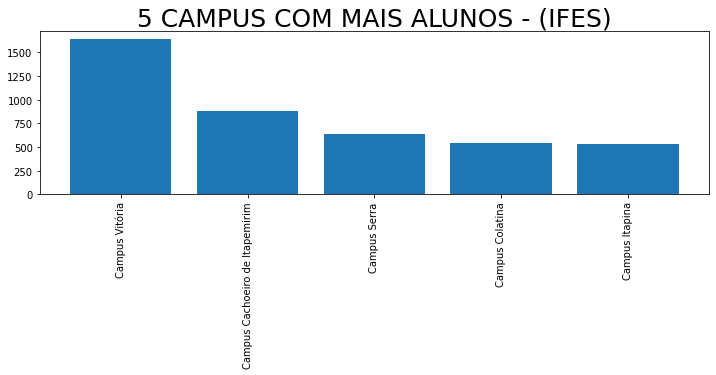

In [ ]:
# 5 CAMPUS COM MAIS ALUNOS

'''
filtro_campus = df["Instituição"].value_counts().head(5)

dicio_campus = {
    'CAMPUS': filtro_campus.index,
    "N° DE MATRICULADOS": filtro_campus.values
}

plt.figure(figsize=(12, 3))
plt.bar(dicio_campus['CAMPUS'], dicio_campus['N° DE MATRICULADOS'])
plt.title('5 CAMPUS COM MAIS ALUNOS - (IFES)', fontsize = 25)
plt.xticks(rotation = 90)
plt.show()
'''

In [ ]:
# 5 CAMPUS COM MAIS ALUNOS

filtro_campus = df['Instituição'].value_counts().head()

dict_campus = {
    "CAMPUS": filtro_campus.index,
    "N° DE ALUNOS": filtro_campus.values
}

fig = px.bar(dict_campus, x = 'CAMPUS', y = 'N° DE ALUNOS', color= 'N° DE ALUNOS')
fig.show()